<img src="https://becasparatodos.com/wp-content/uploads/2017/01/tec-de-monterrey-maestr%C3%ADas.jpg" style="width: 400px;"/>

<h2><center>Campus Ciudad de México, 
Escuela Ingeniería y Ciencias, 
Computación</center></h2>

<h4><center>Course: TC3020.1 (Machine Learning)</center>
<center>Professor: Mauricio Rosales Rivera</center>
<center>Final Project - Evaluation</center></h4>
    
<h4><center>Date: November 13, 2020</center></h4>
<h4><center><font color="red">Submit: November 24, 2020</font></center></h4>

---

<h4>Grade: </h4>

---
<h4><center>Student's information</center></h4>
<h4>Names:</h4> 

Gerardo Arizmendi Jiménez

José X. Sánchez Aguirre

Diego Arana Quiroz

Itiel Abisai Borja García

Aldo López Vallin

Diego Armando García Luna

  <h4>Students ID:</h4>  

A01334659

A01421097 

A01653692

A01336743

A01338209

A01336163

<h4>Github:</h4>

https://github.com/G-RAWR/Machine-Learning

https://github.com/Yotzify/Machine_learning

https://github.com/diegoaranaq/MachineLearning

https://github.com/ItielBorja/Machine_Learning

https://github.com/Ion388901/Machine-Learning.git

https://github.com/diegogl97/MachineLearning

<center>Apegándome al Código de Ética de los Estudiantes del Tecnológico de Monterrey, me comprometo a que mi actuación en este proyecto esté regida por la honestidad académica. En congruencia con el compromiso adquirido al firmar dicho código, realizaré este proyecto de forma honesta y personal, para reflejar, a través de él, mi conocimiento y aceptar, posteriormente, la evaluación obtenida.</center>

## <font color="brown">Proyecto Final - Aprendizaje Máquina</font>

---

Indicaciones: El proyecto seleccionado será desarrollado siguiendo ciertas condiciones. Deberán seguir la estructura recomendada (pero podrán cambiar títulos, es sólo una sugerencia) y podrán añadir secciones en caso de que ser necesario.

* La entrega límite de entrega de la notebook será: Martes 24 de noviembre.
* Deberán realizar una exposición (entre 10 y 20 minutos a lo mucho), donde proporcionen una explicación acerca de la metodología implementada y los resultados obtenidos.

Esta notebook deberá contener el nombre completo, matrícula y el link correspondiente al GitHub de cada integrante.
En caso de no tener la información aquí solicitada, no se evaluará el proyecto.

<a id="general"></a>
### Contenido

-----

1. [Objetivo](#a)

2. [Exploración de Datos](#b)
    * Detección de valores faltantes
    * Agregando valores
    * Visualizando datos
    * Preprocesamiento de datos
        * Reducción de dimensiones
        
-----
3. [Selección de modelos](#c)
    * Aprendizaje No Supervisado / Supervisado
        * Selección de modelo
        * Selección de hiperparámetros
        * Entrenamiento
        * Prueba
        * Resultados
-----

4. [Conclusiones](#d)

-----

<a id="a"></a>
### 1. Objetivo

---
[Regresar a contenido](#general)

Determinar la generación más fuerte de Pokemon en cuanto a sus estadísticas, utilizando métodos de aprendizaje de máquina. 

<img src="https://worldsstone.com/strongest/wp-content/uploads/2017/10/Mewtwo-Pokemon-stairs-the-First-Movie-780x390.jpg" style="width: 400px;"/>

<a id="b"></a>
### 2. Exploración de Datos

---
[Regresar a contenido](#general)

En esta sección se trata de realizar una breve explicación del conjunto de datos a utilizar. Así como tener un orden al momento de importar librerías, mostrar gráficos del EDA y preprocesamiento de los datos.

Generación más fuerte de Pokémon:

En la base de datos se tiene por hileras, el numero de pokémon que tienen su respectiva generación así como el total habilidad que tiene, siendo la suma de "HP", "Attack", "Defense", "Sp. Attack", "Sp. Def", "Speed".

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy  as np
from mpl_toolkits.mplot3d import Axes3D

pf = pd.read_csv("Pokemon.csv")
pf2 = pf.drop(['Type 2'], axis = 1)
pf2.to_csv('pokeCleanData.csv')

pf2 = pd.read_csv("pokeCleanData.csv")
data  = np.array(pf2[['Generation','Total']])
power = []

Luego se crea un arreglo con solo la generación correspondiente y el total de poder/habilidad.

Siendo Kmeans un algoritmo de categorización que agrupa en segmentos llamados Clusters a partir de valores parecidos dentro nuestra información. 



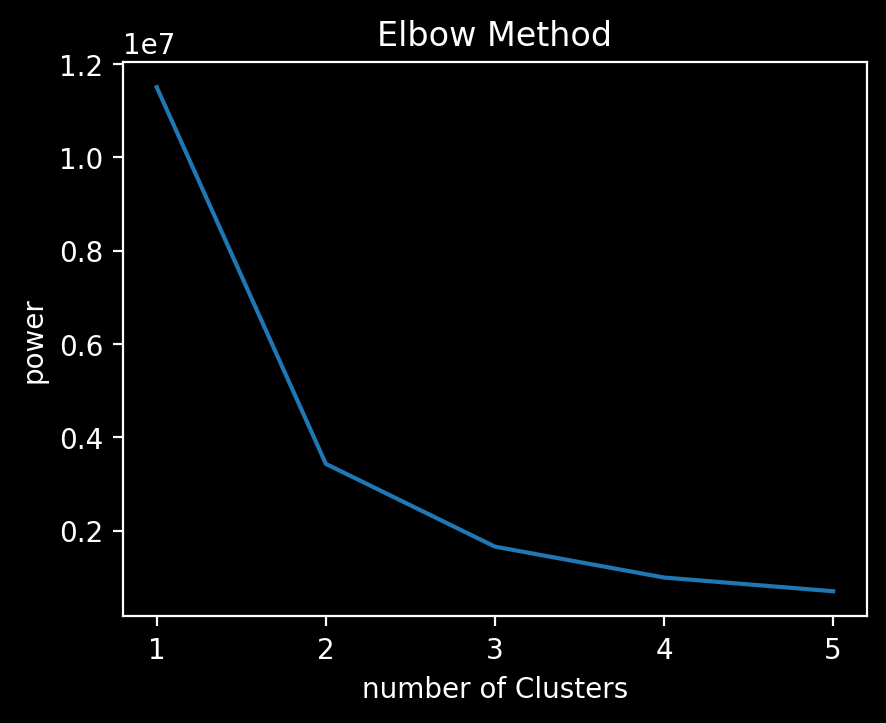

In [ ]:

for i in range(1, 6):
    kmeans = KMeans(i)
    kmeans.fit(data)
    power.append(kmeans.inertia_)
    
plt.plot(range(1, 6), power)
plt.title('Elbow Method')
plt.xlabel('number of Clusters')
plt.ylabel('power')
plt.show()

Es una técnica muy popular y la idea es ejecutar k-means clustering para un rango de clusters y para cada valor de k calcular la suma de las distancias al cuadrado de cada punto a su centro asignado (distorsiones).
La gráfica de las distorsiones parece un brazo y el “codo” o el punto de inflexión en la curva, es el mejor valor de k.


Se crearon 6 clusters para que la grafica tuviera un comportamiento adecuado.  


<a id="c"></a>
### 3. Selección de modelos

---
[Regresar a contenido](#general)

En esta sección se trata de realizar una breve explicación de la metodología de aprendizaje automático. En caso de aplicar un **pipeline** de aprendizaje no supervisado y / o supervisado, que tenga un orden claro y expliquen el porqué de su aplicación con lo que han percibido de sus datos. 

El modelo seleccionado, qué parámetros o hiperparámetros eligieron, el porqué entrenaron con cierto tamaño de muestra y los resultados obtenidos.

Esto a partir del "Elbow  Method", este algoritmo no  supervisado agrupa la informacion por su cuenta, para así  ver un promedio del valor de la información.

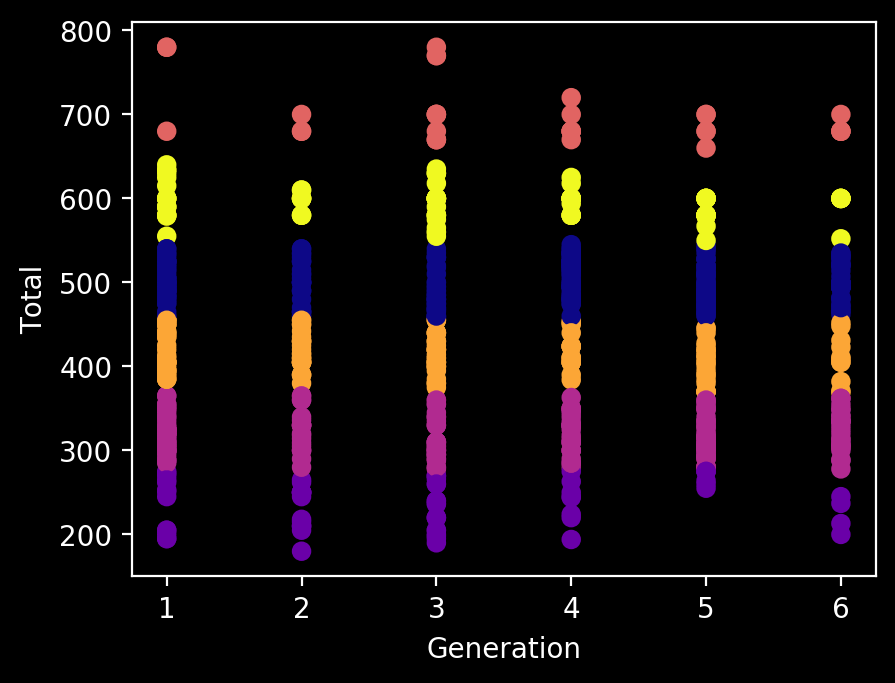

In [ ]:
kmeans = KMeans(n_clusters=6)

labels = kmeans.fit_predict(data)

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='plasma')

plt.xlabel('Generation')
plt.ylabel('Total')


Se utiliza una grafica de Scatter, para visualizar lo obtenido; cada punto de color representa un pokemon, donde el eje horizontal es la  generacion y el eje Vertical el poder/habilidad total. Se siguen utilizando los mismos clusters. 

A simple viste se puede inferir que las generaciones 1  y 3 son las más fuertes

Se genera un DataFrame que contiene unicamente el pokemon,  el poder total, la generación a la que pertenece y el cluster. Despues este se guarda en archivo local con formato CSV, para ser accedido luego.   

In [ ]:
newData = pd.DataFrame()
newData['Name']=pf2['Name'].values
newData['Total']=pf2['Total'].values
newData['Generation']=pf2['Generation'].values


newData['Cluster'] = labels
newData = newData.sort_values(by=['Cluster'])
newData.to_csv(path_or_buf="kmeansData.csv")

total = pd.DataFrame()
total['total'] = newData.groupby('Cluster').size()
print(total)


         total
Cluster       
0          144
1          147
2          196
3           72
4          181
5           60


El siguiente código nos permite seleccionar el cluster deseado, siendo la categorización de poder y una generación específica, para posteriormente mostrar la lista de pokemons  que pertencen  a esta agrupación. 

In [ ]:
###################################
pf3 = pd.read_csv("kmeansData.csv")

clusterNumber = input("Ingresa el cluster deseado")
clusterNumber1 = int(clusterNumber)

dGeneration = input("Ingresa la generacion deseada")
dGeneration1 = int(dGeneration)


print(pf3.loc[(pf3['Cluster']== clusterNumber1) & (pf3['Generation'] == dGeneration1)])



Ingresa el cluster deseado3
Ingresa la generacion deseada3
     Unnamed: 0                     Name  Total  Generation  Cluster
516         283    SwampertMega Swampert    635           3        3
517         279    BlazikenMega Blaziken    630           3        3
523         409  SalamenceMega Salamence    700           3        3
525         426    RayquazaMega Rayquaza    780           3        3
526         425                 Rayquaza    680           3        3
527         424    GroudonPrimal Groudon    770           3        3
528         423                  Groudon    670           3        3
529         422      KyogrePrimal Kyogre    770           3        3
530         420        LatiosMega Latios    700           3        3
532         412                Metagross    600           3        3
535         408                Salamence    600           3        3
537         413  MetagrossMega Metagross    700           3        3
549         354    CameruptMega Camerupt    

Se hace la agrupación total de cada generación  para determinar el nivel de poder de esta. Se determina que la generación 5 es la más fuerte. 

In [ ]:
listGeneration = list(zip(pf3['Total'],pf3['Generation']))

generation1 = []
generation2 = []
generation3 = []
generation4 = []
generation5 = []
generation6 = []

strongestGeneration = []


for i in listGeneration:
    if i[1] == 1:
        generation1.append(i[0])
        g1 = sum(generation1)

    elif i[1] == 2:
        generation2.append(i[0])
        g2 = sum(generation2)

    elif i[1] == 3:
        generation3.append(i[0])
        g3 = sum(generation3)

    elif i[1] == 4:
        generation4.append(i[0])
        g4 = sum(generation4)

    elif i[1] == 5:
        generation5.append(i[0])
        g5 = sum(generation5)

    elif i[1] == 6:
        generation6.append(i[0])
        g6 = sum(generation6)

print(" Total power generation 1:",g1,"\n",
      "Total power generation 2:",g2,"\n",
      "Total power generation 3:",g3,"\n",
      "Total power generation 4:",g4,"\n",
      "Total power generation 5:",g5,"\n",
      "Total power generation 6:",g6)

strongestGeneration.append((g1,g2,g3,g4,g5,g6))
print("\nThe strongest generation is five ->",max(strongestGeneration[0]))


 Total power generation 1: 70851 
 Total power generation 2: 44338 
 Total power generation 3: 69796 
 Total power generation 4: 55541 
 Total power generation 5: 71773 
 Total power generation 6: 35783

The strongest generation is five -> 71773


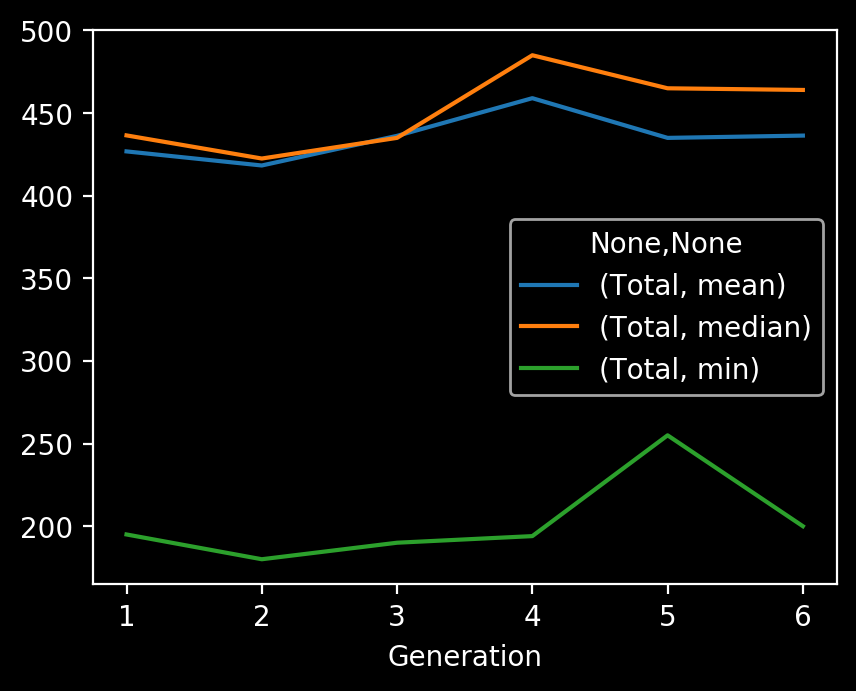

In [ ]:
pivot = pf3.pivot_table(index=['Generation'], values=['Total'], aggfunc={'median','mean','min'}).plot()

Se hace la agrupación total de cada generación  para determinar el nivel de poder de esta. Se determina que la generación 5 es la más fuerte. 

A continuació se presenta una vista diferente a los cluster utilizados:

Generation
1    166
2    106
3    160
4    121
5    165
6     82
dtype: int64


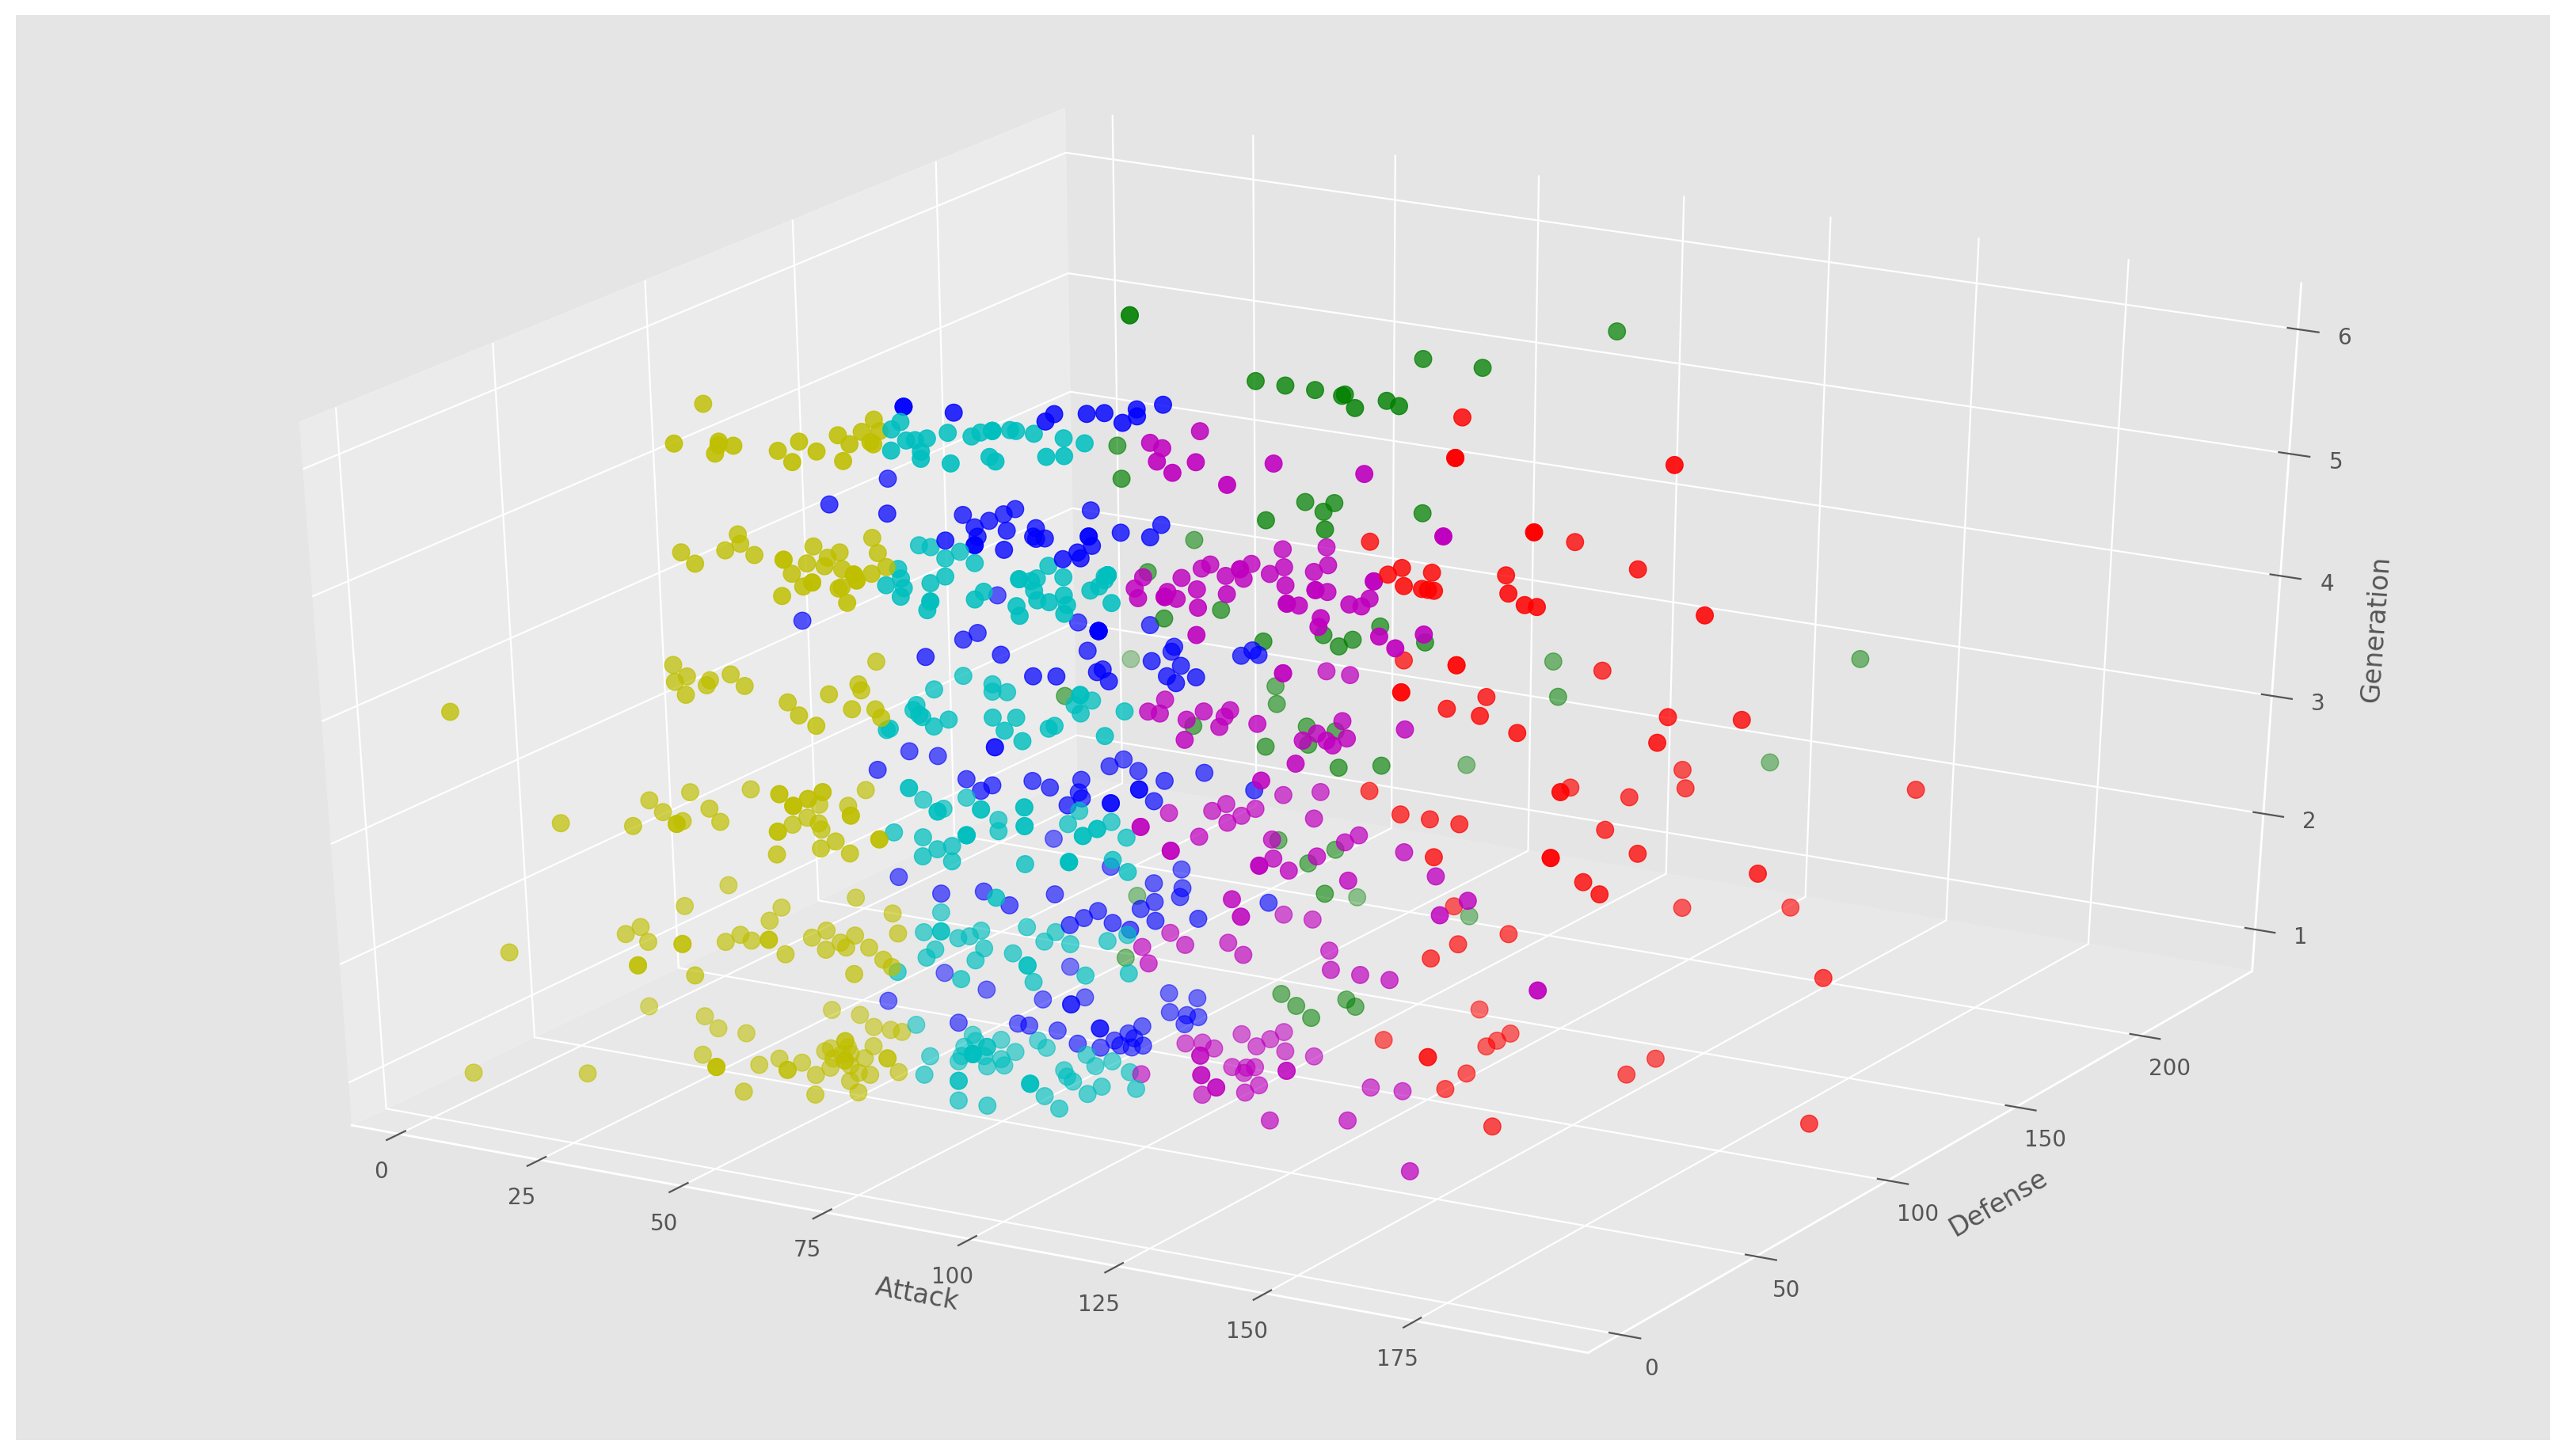

In [ ]:

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
colors=['b','g','r','c','m','y']

pf2 = pd.read_csv("pokeCleanData.csv")
print(pf2.groupby('Generation').size())# Get total pokemons per generation

X = np.array(pf2[['Attack','Defense','Generation']])

kmeans = KMeans(n_clusters=6).fit(X)
labels = kmeans.predict(X)

aColors=[]
for r in labels:
    aColors.append(colors[r])

graph = plt.figure()
ax = Axes3D(graph)
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=aColors,s=60)

ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.set_zlabel('Generation')

plt.show()


<a id="d"></a>
### 4. Conclusiones

---
[Regresar a contenido](#general)

De su análisis, qué pueden concluir? Qué posibilidades extras pudieran aplicarse o con qué finalidad realizaron el trabajo.

Se obtuvieron 6 clusters por K-means, la agrupación de los clusters se llevó a cabo  por la fuerza total de cada pokémon, donde se determinó que la quinta generación es la más poderosa. También se determinó que la generación más débil resulta ser la generación dos. 

Para trabajo a futuro se podría dividir cada generación en sus respectivos tipos de Pokemon y definir el Pokemon más fuerte de cada uno de ellos.



